In [63]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

### 하이퍼 파라미터(배치, 에폭, 옵티마이저, 손실 등!)

In [64]:
HP = {
    'learning_rate':0.00001,
    'batch_size':16, 
    'epoch':100,
    'latent_size':128,
}

In [65]:
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 PyTorch 텐서로 변환
])

train_dataset = datasets.STL10(root='./data', split='train', download=True, transform = transform)
test_dataset = datasets.STL10(root='./data', split='test', download=True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


#### 데이터 로더 만들기

In [66]:
train_loader = DataLoader(train_dataset, batch_size=HP['batch_size'], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

In [67]:
class AutoEncoder(nn.Module):
    def __init__(self, latent_size=HP['latent_size']):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(96*96*3, 4096),
            nn.Sigmoid(),
            nn.Linear(4096, 1024),
            nn.Sigmoid(),
            nn.Linear(1024, 256),
            nn.Sigmoid(),
            nn.Linear(256, latent_size),
            nn.Sigmoid(),
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 256),
            nn.Sigmoid(),
            nn.Linear(256, 1024),
            nn.Sigmoid(),
            nn.Linear(1024, 4096),
            nn.Sigmoid(),
            nn.Linear(4096, 96*96*3),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        # encoder 의 output
        latent_vector = self.encoder(x)
        output = self.decoder(latent_vector)
        return output, latent_vector

In [68]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [69]:
model = AutoEncoder().to(device)
# 데이터 병렬처리
# model = AutoEncoder()
# model = nn.DataParallel(model)
# model.to(device)

optimizer = optim.Adam(model.parameters(), lr = HP['learning_rate'])
criterion = nn.MSELoss()

In [70]:
for epoch in range(HP['epoch']):
    for batch, _ in tqdm(train_loader):
        batch = batch.to(device)
        label = batch.view(batch.size(0), -1)
        
        output, _ = model(batch)
        loss = criterion(output, label)
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch [{epoch + 1} / {HP["epoch"]}], Loss : {loss.item():.4f}')
print("Training Complete")

100%|██████████| 313/313 [00:11<00:00, 27.12it/s]


Epoch [1 / 100], Loss : 0.0503


100%|██████████| 313/313 [00:11<00:00, 27.11it/s]


Epoch [2 / 100], Loss : 0.0748


100%|██████████| 313/313 [00:11<00:00, 27.12it/s]


Epoch [3 / 100], Loss : 0.0832


100%|██████████| 313/313 [00:11<00:00, 27.11it/s]


Epoch [4 / 100], Loss : 0.0678


100%|██████████| 313/313 [00:11<00:00, 27.11it/s]


Epoch [5 / 100], Loss : 0.0947


100%|██████████| 313/313 [00:11<00:00, 27.11it/s]


Epoch [6 / 100], Loss : 0.0665


100%|██████████| 313/313 [00:11<00:00, 27.11it/s]


Epoch [7 / 100], Loss : 0.0600


100%|██████████| 313/313 [00:11<00:00, 27.11it/s]


Epoch [8 / 100], Loss : 0.0682


100%|██████████| 313/313 [00:11<00:00, 27.11it/s]


Epoch [9 / 100], Loss : 0.0785


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [10 / 100], Loss : 0.0560


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [11 / 100], Loss : 0.0757


100%|██████████| 313/313 [00:11<00:00, 27.11it/s]


Epoch [12 / 100], Loss : 0.0646


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [13 / 100], Loss : 0.0524


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [14 / 100], Loss : 0.0672


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [15 / 100], Loss : 0.0627


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [16 / 100], Loss : 0.0639


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [17 / 100], Loss : 0.0728


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [18 / 100], Loss : 0.0675


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [19 / 100], Loss : 0.0554


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [20 / 100], Loss : 0.0561


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [21 / 100], Loss : 0.0684


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [22 / 100], Loss : 0.0450


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [23 / 100], Loss : 0.0745


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [24 / 100], Loss : 0.0741


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [25 / 100], Loss : 0.0803


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [26 / 100], Loss : 0.0667


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [27 / 100], Loss : 0.0577


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [28 / 100], Loss : 0.0542


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [29 / 100], Loss : 0.0591


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [30 / 100], Loss : 0.0717


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [31 / 100], Loss : 0.0758


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [32 / 100], Loss : 0.0567


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [33 / 100], Loss : 0.0761


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [34 / 100], Loss : 0.0454


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [35 / 100], Loss : 0.0593


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [36 / 100], Loss : 0.0490


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [37 / 100], Loss : 0.0780


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [38 / 100], Loss : 0.0691


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [39 / 100], Loss : 0.0488


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [40 / 100], Loss : 0.0607


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [41 / 100], Loss : 0.0629


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [42 / 100], Loss : 0.0414


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [43 / 100], Loss : 0.0620


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [44 / 100], Loss : 0.0569


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [45 / 100], Loss : 0.0461


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [46 / 100], Loss : 0.0554


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [47 / 100], Loss : 0.0675


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [48 / 100], Loss : 0.0517


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [49 / 100], Loss : 0.0517


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [50 / 100], Loss : 0.0614


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [51 / 100], Loss : 0.0512


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [52 / 100], Loss : 0.0641


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [53 / 100], Loss : 0.0630


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [54 / 100], Loss : 0.0628


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [55 / 100], Loss : 0.0521


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [56 / 100], Loss : 0.0459


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [57 / 100], Loss : 0.0569


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [58 / 100], Loss : 0.0586


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [59 / 100], Loss : 0.0401


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [60 / 100], Loss : 0.0349


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [61 / 100], Loss : 0.0516


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [62 / 100], Loss : 0.0416


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [63 / 100], Loss : 0.0606


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [64 / 100], Loss : 0.0520


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [65 / 100], Loss : 0.0615


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [66 / 100], Loss : 0.0767


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [67 / 100], Loss : 0.0776


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [68 / 100], Loss : 0.0483


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [69 / 100], Loss : 0.0504


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [70 / 100], Loss : 0.0685


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [71 / 100], Loss : 0.0399


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [72 / 100], Loss : 0.0609


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [73 / 100], Loss : 0.0414


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [74 / 100], Loss : 0.0493


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [75 / 100], Loss : 0.0483


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [76 / 100], Loss : 0.0504


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [77 / 100], Loss : 0.0598


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [78 / 100], Loss : 0.0477


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [79 / 100], Loss : 0.0658


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [80 / 100], Loss : 0.0441


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [81 / 100], Loss : 0.0614


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [82 / 100], Loss : 0.0413


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [83 / 100], Loss : 0.0516


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [84 / 100], Loss : 0.0579


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [85 / 100], Loss : 0.0464


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [86 / 100], Loss : 0.0651


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [87 / 100], Loss : 0.0626


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [88 / 100], Loss : 0.0612


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [89 / 100], Loss : 0.0517


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [90 / 100], Loss : 0.0499


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [91 / 100], Loss : 0.0555


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [92 / 100], Loss : 0.0594


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [93 / 100], Loss : 0.0650


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [94 / 100], Loss : 0.0528


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [95 / 100], Loss : 0.0486


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [96 / 100], Loss : 0.0523


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [97 / 100], Loss : 0.0551


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [98 / 100], Loss : 0.0668


100%|██████████| 313/313 [00:11<00:00, 27.10it/s]


Epoch [99 / 100], Loss : 0.0480


100%|██████████| 313/313 [00:11<00:00, 27.09it/s]


Epoch [100 / 100], Loss : 0.0520
Training Complete


## 모델 테스팅

In [71]:
dataiter = iter(test_loader)
images, _ = next(dataiter)
images_flattend = images.view(images.size(0), -1).to(device)

In [72]:
output, _ =  model(images_flattend)
output = output.view(output.size(0), 3, 96, 96).detach()

In [73]:
output.shape

torch.Size([20, 3, 96, 96])

## 이미지 결과 시각화

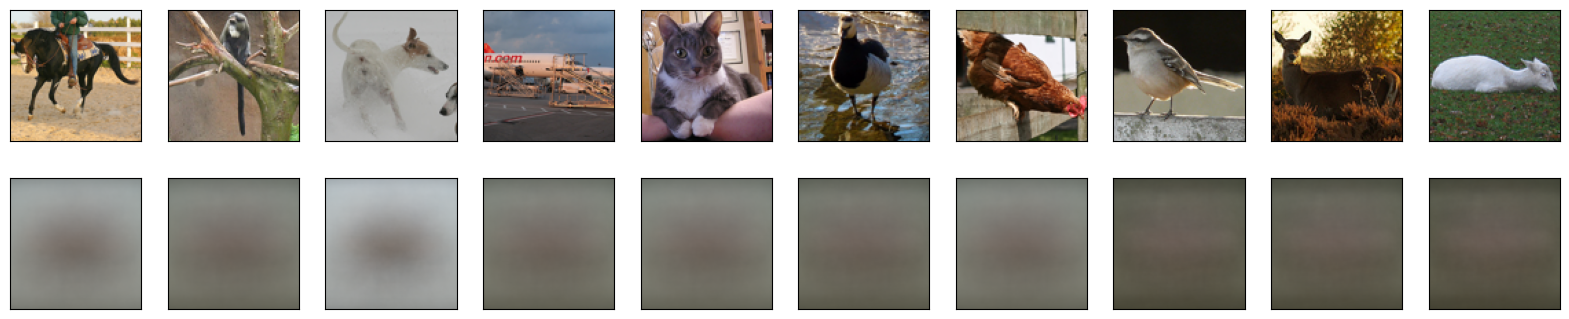

In [74]:
fig, axes = plt.subplots(nrows=2, ncols = 10, sharex=True, sharey=True, figsize=(20,4))

for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        img = img.to('cpu').permute(1,2,0)
        ax.imshow(img.squeeze().numpy())
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.show()